# COGS 108 - Data Checkpoint

# Permissions

Place an x in the appropriate bracket below to specify if you would like your project to be made availabe to the pubic. (Note that student names will be included but PIDS will be scraped from any groups who include their PIDs).

- [] YES -make available
- [] NO - keep private

# Names

- Dina Dehaini
- Cody Maheu
- Ryan Jackson
- Lauren Taylor
- Andrew Karafilis Tremaine

# Overview

In this project, we attempted to determine whether a country’s GDP was indicative of how its agricultural exports would be used (either as feed for animals or food for people). From our background research, we think that poorer countries seem to rely more on exporting food and more expensive products since they are generally worth more. Based on this, we hypothesized that wealthier countries export more feed than food and poorer countries would export more food than feed. Using three datasets including GDP, GDP per capita, and food/feed exports and imports, we were able to analyze and identify a small positive correlation between a country’s wealth and its eed exports, however with an incredibly low P-value, we believe the correlation to be too small to reject the null hypothesis and believe other variables such as policies, geographic location, and historical context prevent GDP from being an accurate predictor.


<a id='research_question'></a>
# Research Question

Can the wealth of a country determine whether their agricultural exports will be used as food (finalized goods for humans) or feed (raw product for consumption by animals to produce other goods)?

# Background and Prior Work

Today, the United States is the world’s number one food exporter by dollar value. Much of the world’s top exporters are developed countries and produce enough animal feed to export to developing countries. (1) Due to a number of conflicting variables, mostly population growth and pre-existing dependency, developing countries have been heavily reliant on imported foods in order to feed rising populations. (2) Developing countries tend to grow and export products and cash crops, which results in these countries growing less and importing more food crops from more developed countries. (3)

With developing countries becoming more and more reliant on food imports and their populations continuously expanding, many developed countries can expect to continue and increase trends of exporting to poorer countries. (1) With expanding populations, developing countries are expected to account for most of the world’s food imports and consumption. For example, with foods such as wheat, “Developing countries are expected to account for 82 percent of the increase in world wheat consumption and 93 percent of the increase in the world.” (3) Demand side drivers of change are heavily influenced by changing food consumption patterns. (4) The drivers of the food transition process are the same today in developing countries as they were in the past in developed nations because the process is quicker due to growing importance in supermarkets and large-scale food manufacturers.

Based on this research, we are able to formulate a research question to hypothesize about how this drive applies to the import and export of animal feed, and the specific relationship between a country’s GDP and whether their agricultural exports will be used as food or feed.
References (include links):

(1) https://news.un.org/en/story/2018/07/1013872

(2)https://www.researchgate.net/publication/227374392_Agricultural_Exports_and_Economic_Growth_in_Developing_Countries_A_Panel_Cointegration_Approach

(3) https://www.ers.usda.gov/amber-waves/2013/august/developing-countries-dominate-world-demand-for-agricultural-products/

(4) https://hal.archives-ouvertes.fr/hal-01210543/document


# Hypothesis

We believe that wealthier countries export more feed than food. From our background research, we think that poorer countries seem to rely more on exporting food and more expensive products since they are generally worth more.

From our background research, we think that poorer countries seem to rely more on exporting food and more expensive products since they are generally worth more. Due to this as well as large growing populations, poorer countries would hypothetically need to rely more heavily on food and feed imports to make up for the fact that many of them grow cash crops instead of cheaper agricultural products such as animal feed. In contrast, countries with higher a GDP would be able to produce enough feed for their own populations as well as other nations and would be able to export to poorer countries for a profit. Based on this, we hypothesize that wealthier countries export more feed than food and poorer countries would export more food than feed.   

# Dataset(s)

**Dataset Name:** GDP (Current US$) **(GDP)**
 - **Link to Dataset:** https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?end=2019&name_desc=false&start=1960
 - **Number of observations:** 265
 - **Description:** World Bank national accounts data, and OECD National Accounts data files of countries’ GDP.
     - **Timeline:** 1960-2019
     - Data are in current U.S. dollars

**Dataset Name:** GDP per Capita(Current US$) **(GDP per Capita)**
 - **Link to Dataset:** https://data.worldbank.org/indicator/NY.GDP.PCAP.CD
 - **Number of observations:** 264
 - **Description:** World Bank national accounts data, and OECD National Accounts data files of countries’ GDP per Capita.
     - **Timeline:** 1960-2019
     - Data are in current U.S. dollars
     
**Dataset Name:** Who eats the food we grow? **(FAO)**
 - **Link to Dataset:** https://www.kaggle.com/dorbicycle/world-foodfeed-production
 - **Number of observations:** 21,477
 - **Description:** “The Food and Agriculture Organization of the United Nations provides free access to food and agriculture data for over 245 countries and territories.” (https://www.kaggle.com/dorbicycle/world-foodfeed-production)  The dataset that we are interested in is the Food Balance Sheets. It has the data of a country's food supply during a specified reference period  specifically in our case food/feed.  
     - **Timeline:** 1961-2013
     - Food - refers to the quantity of the food item available as human food during the reference period.
     - Feed - refers to the quantity of the food item available for feeding to the livestock and poultry during the reference period.

**Combining Data**
 - The data will be merged together based on their country code (Area abbreviation in FAO, Country code in GDP and GDP per Capita). We will examine the data that cannot be merged by hand.



# Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

# GDP dataset
gdp = pd.read_csv("GDP.csv")

# GDP per capita dataset
gdp_per_capita = pd.read_csv("GDP_PER_CAPITA.csv")

# Feed vs Food dataset (it's encoded in CP1252...)
fao = pd.read_csv("FAO.csv", encoding="latin1")

# All valid ISO-3166 country codes (for cleaning the GDP dataset)
with open("country_codes.txt", "r") as fh:
    country_codes = set(line[:-1] for line in fh)

# Data Cleaning

Describe your data cleaning steps here.

- The dataset has been read in from CSV files into our Dataframe objects for both FAO, GDP and per Capita.
- We removed rows from the GDP dataset with invalid country codes.
- The FAO dataset has no NaN values, but GDP has NaN values for years where a given country did not exist or was a member of USSR (and some years past 2013 for unknown reasons). We will need to factor this in when merging the datasets.


In [2]:
# Dumping the columns for reference
gdp.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [3]:
# Dumping the columns for reference
gdp_per_capita.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [4]:
# Dumping the columns for reference
fao.columns

Index(['Area Abbreviation', 'Area Code', 'Area', 'Item Code', 'Item',
       'Element Code', 'Element', 'Unit', 'latitude', 'longitude', 'Y1961',
       'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
       'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977',
       'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985',
       'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013'],
      dtype='object')

In [5]:
# Remove any countries from the GDP dataset that aren't in the FAO dataset.
# Also ensure they're all valid country codes -- there are several
# "total" rows that sum together multiple countries in the GDP dataset.
fao_countries = set(fao["Area Abbreviation"])
valid_countries = fao_countries & country_codes
gdp = gdp[[country in valid_countries for country in gdp["Country Code"]]]

# Year, Country Code, Tons of Food, Tons of Feed, Real GDP, Real GDP Per Capita
data = pd.DataFrame(columns=["year", "country", "food", "feed", "gdp", "gdp_per_capita"])

#for reasons regarding the start and end date, see the EDA section with the plot of countries with feed/food
#    data over time.
START = 1992
END = 2013

for year in range(START, END + 1):
    # Convert from thousands of tons to tons
    food_totals = fao[fao["Element"] == "Food"].groupby(["Area Abbreviation"])["Y%d" % year].sum() * 1000
    feed_totals = fao[fao["Element"] == "Feed"].groupby(["Area Abbreviation"])["Y%d" % year].sum() * 1000

    for _, country in gdp.iterrows():
        gdp_for_year = country[str(year)]
        food_for_year = food_totals[country["Country Code"]]
        per_capita_for_year, = gdp_per_capita[gdp_per_capita["Country Code"] == country["Country Code"]][str(year)]

        # Throw out unless we have both GDP data and food export data for the year
        # (feed export data can be 0)
        if not np.isnan(gdp_for_year) and food_for_year > 0:
            data = data.append({
                "year": year,
                "country": country["Country Code"],
                "food": food_for_year,
                "feed": feed_totals[country["Country Code"]],
                "gdp": gdp_for_year,
                "gdp_per_capita": per_capita_for_year
            }, ignore_index=True)

In [6]:
# Dictionary to convert from country codes to full name
country_names = dict(zip(gdp["Country Code"], gdp["Country Name"]))

START and END were chosen after looking at the data in the EDA section, and our recognition that a huge chunk of missing data prior to 1992 was due to the countries created after the USSR was dissolved. In order to include the most amount of usable data, we thus chose the years between and including 1992 and 2013 (when the data ends). As such, all three data sets needed to be cleaned across these years as well as removing countries with invalid country codes or additional NaN data.

# Data Analysis & Results (EDA)

Checking the last year of our data to see what country's GDP, feed vs food products, and per Capita look like:

In [7]:
latest = data[data["year"] == 2013]

In [8]:
# Show the top and bottom 10 countries by GDP in 2013.
out = latest.sort_values("gdp", ascending=False)
out["country"] = out["country"].apply(lambda x: country_names[x])

In [9]:
out.head(n=10)

,year,country,food,feed,gdp,gdp_per_capita
3530,2013,United States,6.417760e+08,296863000.0,1.678485e+13,53117.667850
3402,2013,China,2.541768e+09,702607000.0,9.570406e+12,7050.646271
3451,2013,Japan,1.531610e+08,34952000.0,5.155717e+12,40454.447458
3412,2013,Germany,1.584730e+08,60418000.0,3.732743e+12,46285.764069
3425,2013,France,1.205420e+08,45537000.0,2.811078e+12,42592.934094
3427,2013,United Kingdom,1.229460e+08,27033000.0,2.786023e+12,43444.533002
3394,2013,Brazil,3.124880e+08,127479000.0,2.472807e+12,12300.324882
3502,2013,Russian Federation,2.538920e+08,117021000.0,2.292473e+12,15974.644627
3448,2013,Italy,1.211630e+08,32287000.0,2.141315e+12,35549.974697
3442,2013,India,1.238335e+09,98258000.0,1.856722e+12,1449.605912


In [10]:
out.tail(n=10)

,year,country,food,feed,gdp,gdp_per_capita
3380,2013,Antigua and Barbuda,119000.0,0.0,1.181448e+09,12909.744178
3432,2013,Guinea-Bissau,1220000.0,10000.0,1.046087e+09,634.662809
3434,2013,Grenada,122000.0,28000.0,8.426201e+08,7789.776381
3457,2013,St. Kitts and Nevis,56000.0,0.0,8.397741e+08,16686.021183
3535,2013,Vanuatu,370000.0,12000.0,8.017876e+08,3124.233078
3536,2013,Samoa,329000.0,8000.0,7.700217e+08,4037.509315
3532,2013,St. Vincent and the Grenadines,158000.0,63000.0,7.212074e+08,6639.607146
3414,2013,Dominica,138000.0,41000.0,4.982963e+08,7016.676471
3511,2013,Sao Tome and Principe,251000.0,0.0,3.005538e+08,1564.675304
3456,2013,Kiribati,135000.0,0.0,1.851139e+08,1715.765331


Looking at the breakdown of head/tail when sorting on GDP, it would seem as though richer countries tend to export more feed. However, we need to look at the data closer still.

In [11]:
# Show the top and bottom 10 countries by food export in 2013.
out = latest.sort_values("food", ascending=False)
out["country"] = out["country"].apply(lambda x: country_names[x])

In [12]:
out.head(n=10)

,year,country,food,feed,gdp,gdp_per_capita
3402,2013,China,2.541768e+09,702607000.0,9.570406e+12,7050.646271
3442,2013,India,1.238335e+09,98258000.0,1.856722e+12,1449.605912
3530,2013,United States,6.417760e+08,296863000.0,1.678485e+13,53117.667850
3394,2013,Brazil,3.124880e+08,127479000.0,2.472807e+12,12300.324882
3502,2013,Russian Federation,2.538920e+08,117021000.0,2.292473e+12,15974.644627
3441,2013,Indonesia,2.378260e+08,19062000.0,9.125241e+11,3623.911582
3486,2013,Nigeria,2.288770e+08,72046000.0,5.086930e+11,2961.550284
3493,2013,Pakistan,1.809940e+08,9511000.0,2.312186e+11,1208.904310
3473,2013,Mexico,1.665910e+08,43530000.0,1.274443e+12,10725.183317
3412,2013,Germany,1.584730e+08,60418000.0,3.732743e+12,46285.764069


In [13]:
out.tail(n=10)

,year,country,food,feed,gdp,gdp_per_capita
3536,2013,Samoa,329000.0,8000.0,7.700217e+08,4037.509315
3511,2013,Sao Tome and Principe,251000.0,0.0,3.005538e+08,1564.675304
3463,2013,St. Lucia,216000.0,13000.0,1.664817e+09,9378.562363
3532,2013,St. Vincent and the Grenadines,158000.0,63000.0,7.212074e+08,6639.607146
3414,2013,Dominica,138000.0,41000.0,4.982963e+08,7016.676471
3456,2013,Kiribati,135000.0,0.0,1.851139e+08,1715.765331
3434,2013,Grenada,122000.0,28000.0,8.426201e+08,7789.776381
3380,2013,Antigua and Barbuda,119000.0,0.0,1.181448e+09,12909.744178
3392,2013,Bermuda,103000.0,3000.0,6.465756e+09,99471.638898
3457,2013,St. Kitts and Nevis,56000.0,0.0,8.397741e+08,16686.021183


Likewise with the GDP sorting, when sorting on food exports, the usual suspects (USA, China, Russia, Germany, India) appear at the top, and mostly Carribean countries dwell at the bottom. Unfortunately, this breakdown doesn't really help or hurt our hypothesis but rather shows that even traditionally wealthy countries still export most of the world's food in total.

In [14]:
# Show the top and bottom 10 countries by feed export in 2013.
out = latest.sort_values("feed", ascending=False)
out["country"] = out["country"].apply(lambda x: country_names[x])

In [15]:
out.head(n=10)

,year,country,food,feed,gdp,gdp_per_capita
3402,2013,China,2.541768e+09,702607000.0,9.570406e+12,7050.646271
3530,2013,United States,6.417760e+08,296863000.0,1.678485e+13,53117.667850
3394,2013,Brazil,3.124880e+08,127479000.0,2.472807e+12,12300.324882
3502,2013,Russian Federation,2.538920e+08,117021000.0,2.292473e+12,15974.644627
3442,2013,India,1.238335e+09,98258000.0,1.856722e+12,1449.605912
3528,2013,Ukraine,7.958000e+07,74170000.0,1.833101e+11,4029.711252
3486,2013,Nigeria,2.288770e+08,72046000.0,5.086930e+11,2961.550284
3412,2013,Germany,1.584730e+08,60418000.0,3.732743e+12,46285.764069
3420,2013,Spain,8.105100e+07,56543000.0,1.354757e+12,29059.547952
3399,2013,Canada,6.789300e+07,52274000.0,1.847209e+12,52652.593683


In [16]:
out.tail(n=10)

,year,country,food,feed,gdp,gdp_per_capita
3465,2013,Lesotho,1801000.0,2000.0,2.421470e+09,1193.713255
3398,2013,Central African Republic,4185000.0,2000.0,1.691544e+09,380.298168
3456,2013,Kiribati,135000.0,0.0,1.851139e+08,1715.765331
3511,2013,Sao Tome and Principe,251000.0,0.0,3.005538e+08,1564.675304
3380,2013,Antigua and Barbuda,119000.0,0.0,1.181448e+09,12909.744178
3472,2013,Maldives,559000.0,0.0,3.295011e+09,7928.457365
3507,2013,Solomon Islands,727000.0,0.0,1.284699e+09,2248.591321
3503,2013,Rwanda,18547000.0,0.0,7.819538e+09,723.258313
3413,2013,Djibouti,791000.0,0.0,2.042817e+09,2312.728803
3457,2013,St. Kitts and Nevis,56000.0,0.0,8.397741e+08,16686.021183


After sorting by feed, the data seems to suggest supporting our hypothesis! Hugely wealthy countries tend to dominate the top 10 feed exporters (with the exception of Ukraine and Nigeria) and relatively poor countries seem to export far less feed. 

<AxesSubplot:xlabel='gdp', ylabel='Density'>

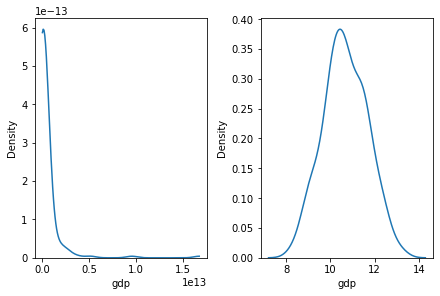

In [17]:
# Unscaled and log-scale plots of the distribution of GDP
# Average is a "10 figure" GDP from reading the log plot
fig, (normal, log) = plt.subplots(1, 2, constrained_layout=True)
sns.kdeplot(latest["gdp"], cut=0, ax=normal)
sns.kdeplot(np.log10(latest["gdp"]), ax=log)

In order to make sure our data is usable, we plotted the density of GDP across 2013 to see the distribution across a single year. After normalizing using log-normal we can see the data is approximately log normal.

<AxesSubplot:xlabel='gdp_per_capita', ylabel='Density'>

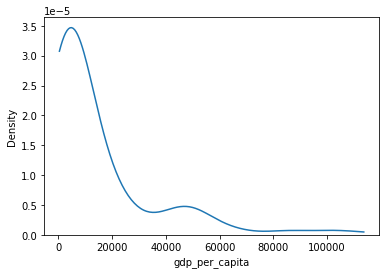

In [31]:
# Unscaled distribution of GDP per capita
sns.kdeplot(latest["gdp_per_capita"],cut=0)

<AxesSubplot:xlabel='food', ylabel='Density'>

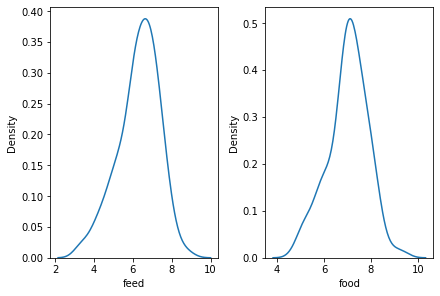

In [19]:
# Log-scale plots of the distribution of total feed exported and total food exported in 2013
# Measured in tons
fig, (normal, log) = plt.subplots(1, 2, constrained_layout=True)

sns.kdeplot(np.log10(latest[latest["feed"] > 0]["feed"]), ax=normal)
sns.kdeplot(np.log10(latest["food"]), ax=log)

Likewise, the distribution of food and feed are also both approximately log-normal. 

From here, we want to look at the data and see when and why missing data occurs. Again, we will stick with our single year example of 2013.

In [ ]:
# All countries that exported no feed in 2013
out = latest[latest["feed"] <= 0][:]
out["country"] = out["country"].apply(lambda x: country_names[x])

out

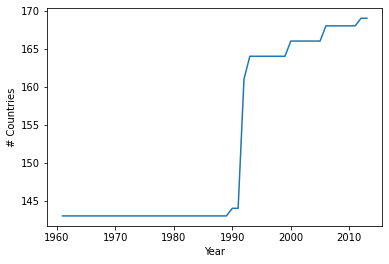

In [21]:
# Number of countries with data present over time
food = fao[fao["Element"] == "Food"].groupby(["Area Abbreviation"]).sum()
years = [np.count_nonzero(food["Y%d" % i]) for i in range(1961, END + 1)]

sns.lineplot(x=range(1961, END+1), y=years)
plt.xlabel("Year")
_ = plt.ylabel("# Countries")

After the fall of the Soviet Union, many more countries began to share their Feed/Food data. Rather than use the data from before this data and extrapolate the values, we chose to only consider data from 1992-2013. Additional country data was added after 1992 and these countries are removed from the set. 

NormaltestResult(statistic=8.66624439353652, pvalue=0.01312649992848708)


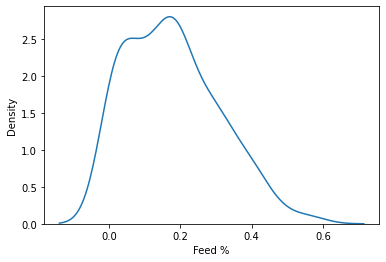

In [30]:
# Distribution of percentange of exports that are feed
percents = latest["feed"] / (latest["food"] + latest["feed"])

print(stats.normaltest(percents))
sns.kdeplot(percents)

_ = plt.xlabel("Feed %")

Finally, after checking the distribution of feed to food for 2013, we can see that it is approximately normal. This shows us that the relative amount of agricultural exports in general is skewed toward food rather than feed.

Now we move on to agricultural exports over time rather than a particular year

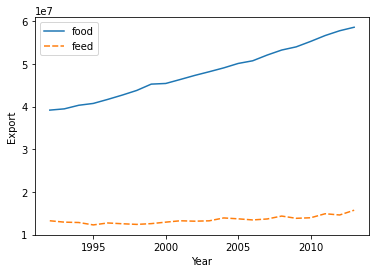

In [33]:
# Mean feed exports versus mean food exports over time
g = data.groupby("year")
sns.lineplot(data=g[["food", "feed"]].agg("mean"))

plt.xlabel("Year")
_ = plt.ylabel("Export (in tons)")

As we can see here, the average amount of food (in tons) exported among all countries in a given year rose between 1992 and 2013 whereas the average amount of feed (in tons) exported seems to stay relatively constant.

Now we want to see across all years, which countries tend to have the highest percentage of their agricultural exports be feed. If our hypothesis is right, we should see a trend where more wealthy countries have a higher percentage of mean feed exports.

In [24]:
mean_gdp = data.groupby("year")["gdp"].agg("mean")
mean_gdp_per_capita = data.groupby("year")["gdp_per_capita"].agg("mean")
mean_ratio = [(year["feed"] / (year["food"] + year["feed"])).agg("mean") for _, year in data.groupby("year")]

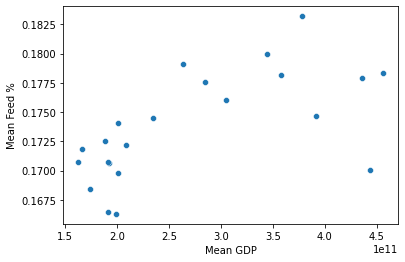

In [25]:
# Scatterplot of mean GDP of all countries in a given year
# versus mean feed % of all countrines in a given year
sns.scatterplot(x=mean_gdp, y=mean_ratio)
plt.xlabel("Mean GDP")
_ = plt.ylabel("Mean Feed %")

So far, our hypothesis seems to hold. However, GDP doesn't take population into account. If we use per Capita instead, we should be able to eliminate population size from the list of confounding variables.

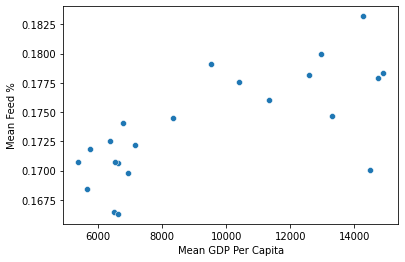

In [26]:
# Scatterplot of mean GDP *per capita* of all countries in a given year
# versus mean feed % of all countrines in a given year
sns.scatterplot(x=mean_gdp_per_capita, y=mean_ratio)
plt.xlabel("Mean GDP Per Capita")
_ = plt.ylabel("Mean Feed %")

Interestingly enough, the scatterplot here looks pretty similar to the scatterplot of mean feed percentage and GDP. This suggests that population does not really play a role in artificially propping up the large GDP values when comparing them to their agricultural feed vs food percentages. 

From here, we want to actually plot a regression lines against the GDP and per Capita scatterplots and see what we get!

R: 0.626845, P-value: 0.001797, Err: 0.000000


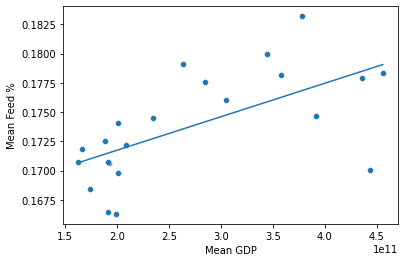

In [27]:
# Linear regressions
slope, intercept, *test_stats = stats.linregress(mean_gdp, mean_ratio)
lim = np.array([min(mean_gdp), max(mean_gdp)])

sns.scatterplot(x=mean_gdp, y=mean_ratio)
sns.lineplot(x=lim, y=slope * lim + intercept)
plt.xlabel("Mean GDP")
plt.ylabel("Mean Feed %")

print("R: %f, P-value: %f, Err: %f" % tuple(test_stats))

Against GDP, our test statistics are not incredibly useful. We have a low p-value, but only a moderately high R value.
This suggests that there is a positive correlation, but only a slight one. Oddly enough, the mean GDP's in the 3.0 (1e11) range seem to be higher than our hypothesis would suggest. 

R: 0.707402, P-value: 0.000231, Err: 0.000000


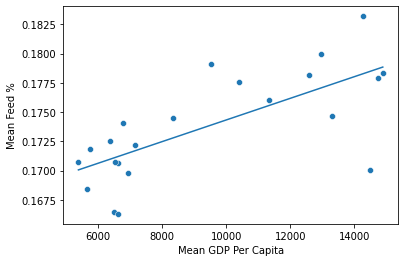

In [28]:
slope, intercept, *test_stats = stats.linregress(mean_gdp_per_capita, mean_ratio)
lim = np.array([min(mean_gdp_per_capita), max(mean_gdp_per_capita)])

sns.scatterplot(x=mean_gdp_per_capita, y=mean_ratio)
sns.lineplot(x=lim, y=slope * lim + intercept)
plt.xlabel("Mean GDP Per Capita")
plt.ylabel("Mean Feed %")

print("R: %f, P-value: %f, Err: %f" % tuple(test_stats))

Like the GDP regression, we have a very low p-value with GDP per Capita. However, a stronger R value and tighter groupings in the scatterplot seem to show a stronger correlation between mean feed percentage and mean GDP per Capita.
Similar to the GDP regression, we also have a "middle" that overperforms our hypothesis and regression line.

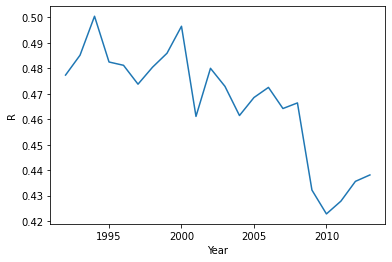

In [35]:
# Line plot of correlation between GDP and feed % over time
rvalues = []

for year in range(START, END + 1):
    year = data[data["year"] == year]
    rvalue = stats.linregress(np.log10(year["gdp"]), year["feed"] / (year["feed"] + year["food"])).rvalue
    rvalues.append(rvalue)

sns.lineplot(x=range(START, END + 1), y=rvalues)
plt.xlabel("Year")
_ = plt.ylabel("R")

Looking at the relationship between GDP and percentage feed exports over time, the R value dips slightly. This isn't much of a dip however, and is fairly consistent considering the study covers 21 years. If anything, the change in R value from ~2006 and ~2010 is the most dramatic and might be explained by the economic crash in the corresponding years.

# Privacy/Ethics Considerations 

Because the data is not referring to individuals privacy will not likely be a concern. Potential biases could be related to how the collection of the data is done. Richer countries might overrepresent their status in order to position themselves compared to their peers. Likewise, countries under strict governance might also overrepresent themself in order to gain a higher standing in the international community. Detecting this bias might be difficult, since there is no way to know whether or not it is actually happening. We do not think there will be any data privacy issues but there is always the concern of bucketing countries by rich or poor and then making a judgement about the people who live there based off of the bucket their country was placed in. It should be mentioned that we are not making any judgements on the financial state of any of these countries nor are we claiming some to be better than others. 

Additionally, we believe the impact of analyzing agricultural data and which countries are more reliant on imports instead of exports and vice versa can allow us to observe which countries may be more impacted by a food/climate crisis. Because some countries may grow cash crops instead of food crops to feed their population, they become more reliant on food or feed exports from that of foregin countries to feed their citizens and account for the population growth many developing countries are heavily experiencing. As a result, a climate crisis and its subsequent food crisis could impact these regions more heavily. Moreover, analyzing this data could allow us insight as to which countries may be on the rise out of poverty as broad-based agricultural development provides an effective means of both reducing poverty and accelerating economic growth. 



# Conclusion and Discussion

The question we sought to answer was whether the wealth of a country determines whether their agricultural exports will be used as food or feed where food was defined as finalized goods for humans and feed as the raw product for consumption by animals to produce other goods. In exploring this question, we hoped to provide some insight into the relationship between a country’s wealth and its agricultural trade practices. Based on our background work and research, we discovered that much of the world’s top exporters are developed countries with higher GDP’s while poorer countries tend to export cash crops, generally worth more, preventing them from growing food for their population. We also found that developing countries were predicted to become increasingly reliant on food imports. Based on this information, we hypothesized that wealthier countries export more feed than food while poorer countries would rely more on exporting food.

Initially, looking at the plotted data, it seems that our hypothesis may have been correct. Looking at the visuals there seems to be a slight positive correlation between the percentage of feed exports and a country’s GDP, however, the correlation is moderately strong with the R-value being about 0.626 as well as a low P-value of 0.001797.
Additionally, in the GDP per capita regression we see another small but stronger positive correlation between GDP and mean percent feed export with the R-value here being slightly larger: 0.707 but the P-value even smaller: 0.00023 . While there seems to be somewhat of a relationship between the two variables, we believe that a number of other variables also influence a country’s agricultural exports preventing GDP per capita from being a reliable predictor. In addition to providing a higher correlation coefficient, the switch from using GDP to GDP per capita in our comparison heavily impacts countries like China and India which have high GDP but a relatively low GDP per capita.
In both regressions, we found that countries that were not on the extreme ends of wealth tended to not follow the predicted correlation. Countries that fell somewhat in the middle of the GDP distribution and especially landlocked countries overperformed the hypothesis. While the cause of this unpredicted behavior could be due to many of these countries’ historical agricultural practices or environmental factors, it can be difficult to pinpoint one variable that lead to these results that are likely caused by a number of factors our data did not account for.
While a country's wealth could provide some indicator as to what that country's agricultural imports and exports may look like, there are many other factors that also play a role in what a country’s agricultural practices may look like today. Historical and political context are important for understanding agricultural practices and impact how accurately we could predict a country’s exports based on GDP or GDP per capita alone. For example, certain countries, like Denmark, Belaruse, Lithuania, and other Baltic countries, have varying GDP’s but due to historical agricultural practices as well their landscape, these countries produce a large amount of cereal grains to export as feed and can be seen as outliers in our results. So while our hypothesis might predict that baltic countries may have lower feed exports based on their somewhat lower GDP, the opposite is true as a result of the region's massive grain production which continues after decades of a series of historical and political events in the region contributed to an agricultural focus on grain crops. 

While our analysis was limited, we enjoyed gaining a deeper understanding of different global agricultural trends over the last couple decades. This type of analysis can be critical in determining the future of developing countries as agricultural practices can play an important role in the growth of a country. Countries such as those in the Middle East/North Africa, Sub-Saharan Africa, and South and East Asia who have growing populations and remain dependent on food imports are already being disproportionately impacted by climate-change. This in addition to the tendency of growing cash crops over subsistence only increases their dependency on foreign imports. 

All in all, while there does seem to be some sort of correlation between a country’s wealth and its food/feed imports, other variables such as historical context, policies, economic history, and location also greatly affect a country’s agricultural practices and should be taken in consideration when analyzing this data. Additionally, countries that fall somewhere in between the high and low ends of the wealth distribution tend to have an even lower correlation. It’s also important to remember that while there may be a correlation between the observed variables that is not the same as causation. So although there appears to be a moderate correlation between country wealth and percent feed exports, there is reason to believe that GDP alone is not an accurate predictor or cause of this trend and several other factors play an important role in a country's agricultural practices over time. 


# Team Contributions

- Dina Dehaini - Data analysis, Data cleaning, Datasets, EDA, Data visualization, Research question, Background, Hypothesis, Project manager, Finalized project

- Cody Maheu - Data analysis, Background, Coding, Data Merging, EDA, Ethics/Privacy, Conclusion/Discussion, Finalized project

- Ryan Jackson - Data analysis, Background, Data statistics, Data cleaning, Datasets, EDA, Data visualization, Conclusion/Discussion, Finalized project

- Lauren Taylor - Data analysis, Overview, Research question, Background, Hypothesis, Ethics/Privacy, Conclusion/Discussion, Finalized project

- Andrew Karafilis Tremaine - Data analysis, Data cleaning, Datasets, EDA, Data visualization, Research question, Background, Ethics/Privacy

